<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/13장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

코랩을 사용하는 경우 맷플롯립 라이브러리를 최신 버전으로 업데이트합니다.

In [1]:
!pip install -U matplotlib

# 13장 그래프 출력과 클래스

## 13.1 맷플롯립으로 그래프 그리기

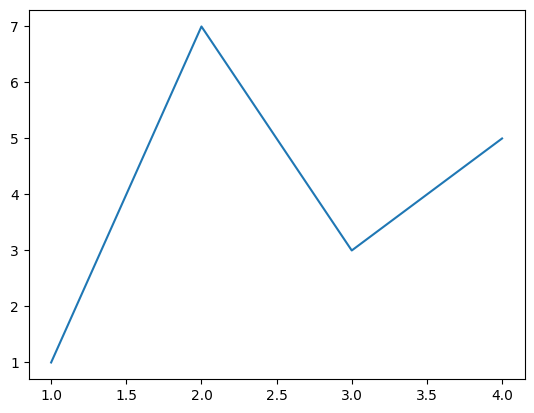

In [2]:
import matplotlib.pyplot as plt 
plt.plot([1,2,3,4], [1,7,3,5]) #현재 피겨에 그래프를 그립니다

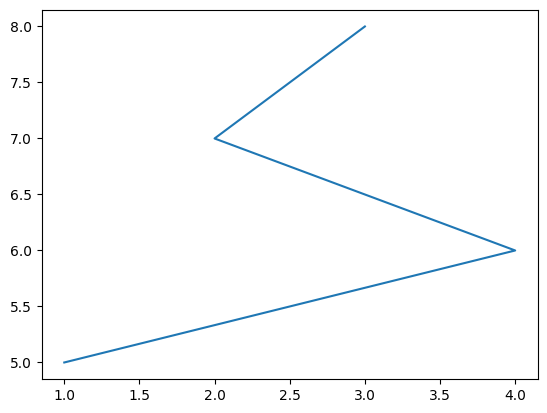

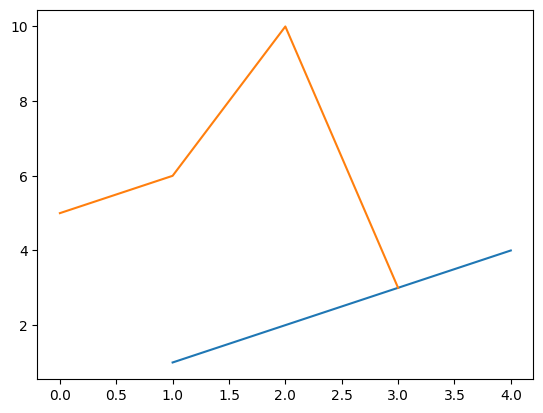

In [3]:
plt.figure(1) #피겨 1을 만듭니다
plt.plot([1,2,3,4], [1,2,3,4]) #피겨 1에 그립니다
plt.figure(2) #피겨 2을 만듭니다
plt.plot([1,4,2,3], [5,6,7,8]) #피겨 2에 그립니다 
plt.savefig('Figure-Addie') #피겨 2를 저장합니다
plt.figure(1) #피겨 1으로 돌아갑니다
plt.plot([5,6,10,3]) #피겨 1에 다시 그립니다
plt.savefig('Figure-Jane') #피겨 1을 저장합니다

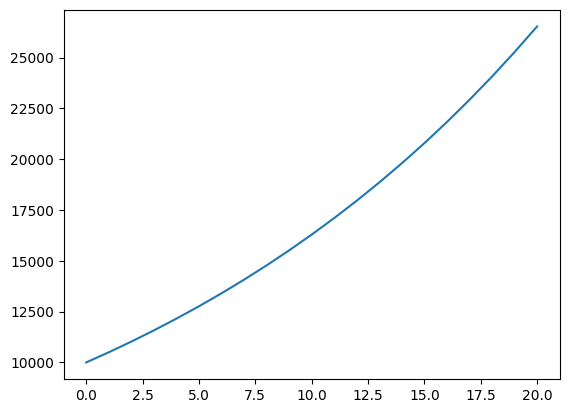

In [4]:
principal = 10000 
interest_rate = 0.05
years = 20 
values = [] 
for i in range(years + 1): 
    values.append(principal) 
    principal += principal*interest_rate 
plt.plot(values) 

Text(0, 0.5, 'Value of Principal ($)')

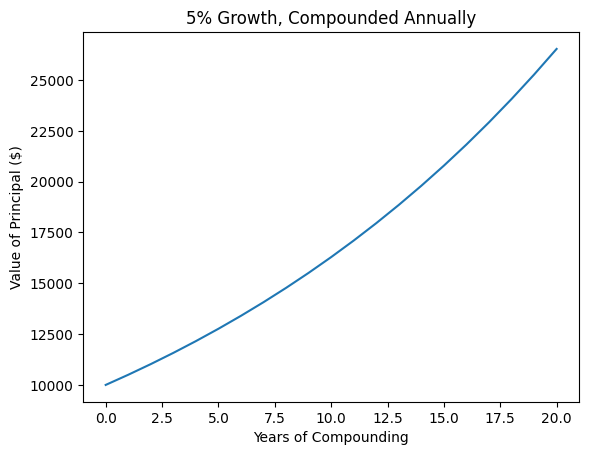

In [5]:
plt.plot(values) 
plt.title('5% Growth, Compounded Annually') 
plt.xlabel('Years of Compounding') 
plt.ylabel('Value of Principal ($)') 

Text(0, 0.5, 'Value of Principal ($)')

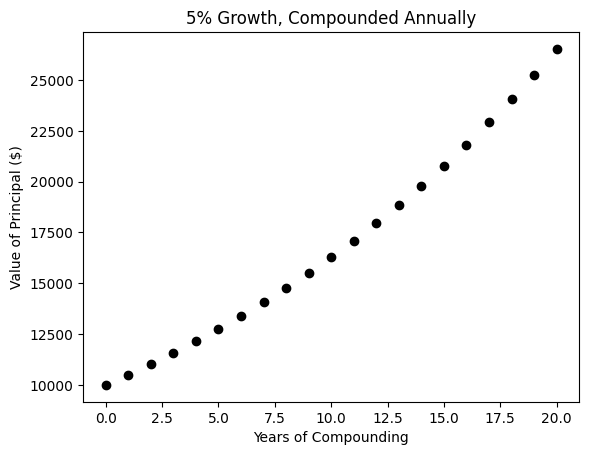

In [6]:
plt.plot(values, 'ko') 
plt.title('5% Growth, Compounded Annually') 
plt.xlabel('Years of Compounding') 
plt.ylabel('Value of Principal ($)') 

Text(0, 0.5, 'Value of Principal ($)')

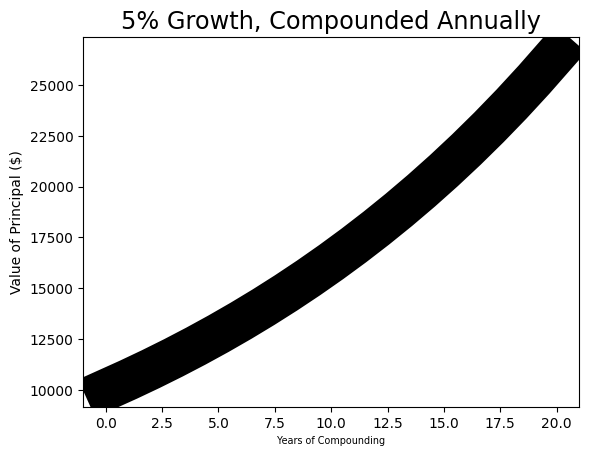

In [7]:
principal = 10000 #초기 투자금
interestRate = 0.05 
years = 20 
values = [] 
for i in range(years + 1): 
    values.append(principal) 
    principal += principal*interestRate 
plt.plot(values, '-k', linewidth = 30) 
plt.title('5% Growth, Compounded Annually', 
          fontsize = 'xx-large') 
plt.xlabel('Years of Compounding', fontsize = 'x-small') 
plt.ylabel('Value of Principal ($)') 

In [8]:
plt.rcParams['lines.linewidth'] = 6.

In [9]:
#선 두께 
plt.rcParams['lines.linewidth'] = 4 
#제목 폰트 크기
plt.rcParams['axes.titlesize'] = 16 
#축 레이블 폰트 크기
plt.rcParams['axes.labelsize'] = 16 
#x 축 텍스트 크기
plt.rcParams['xtick.labelsize'] = 16 
#y 축 텍스트 크기
plt.rcParams['ytick.labelsize'] = 16 
#x 축 눈금 크기
plt.rcParams['xtick.major.size'] = 7 
#y 축 눈금 크기
plt.rcParams['ytick.major.size'] = 7 
#마커 크기
plt.rcParams['lines.markersize'] = 10 
#범례를 표시할 때 마커 표시 개수
plt.rcParams['legend.numpoints'] = 1
#범례 텍스트 크기
plt.rcParams['legend.fontsize'] = 14

## 13.2 모기지 그래프 그리기

그림 13-7 그래프 메서드가 추가된 `Mortgage` 클래스

In [10]:
def find_payment(loan, r, m): 
    """가정: loan과 r은 floats, m은 int입니다.
       m 개월 동안 월이자가 r일 때 모기지 금액 loan의 월 상환액을 반환합니다""" 
    return loan*((r*(1+r)**m)/((1+r)**m -1))

class Mortgage(object):
    """여러 종류의 모기지를 만들기 위한 추상 클래스""" 
    def __init__(self, loan, annRate, months): 
        self._loan = loan 
        self._rate = annRate/12.0 
        self._months = months 
        self._paid = [0.0] 
        self._outstanding = [loan] 
        self._payment = find_payment(loan, self._rate, months) 
        self._legend = None #모기지 설명

    def make_payment(self): 
        self._paid.append(self._payment) 
        reduction = self._payment - self._outstanding[-1]*self._rate 
        self._outstanding.append(self._outstanding[-1] - reduction) 

    def get_total_paid(self): 
        return sum(self._paid) 
    def __str__(self): 
        return self._legend 

    def plot_payments(self, style): 
        plt.plot(self._paid[1:], style, label = self._legend) 

    def plot_balance(self, style): 
        plt.plot(self._outstanding, style, label = self._legend) 

    def plot_tot_pd(self, style): 
        tot_pd = [self._paid[0]] 
        for i in range(1, len(self._paid)): 
            tot_pd.append(tot_pd[-1] + self._paid[i]) 
        plt.plot(tot_pd, style, label = self._legend) 

    def plot_net(self, style): 
        tot_pd = [self._paid[0]] 
        for i in range(1, len(self._paid)): 
            tot_pd.append(tot_pd[-1] + self._paid[i]) 
        equity_acquired = np.array([self._loan]*len(self._outstanding)) 
        equity_acquired = equity_acquired-np.array(self._outstanding) 
        net = np.array(tot_pd) - equity_acquired 
        plt.plot(net, style, label = self._legend) 

In [11]:
import numpy as np 
a1 = np.array([1, 2, 4]) 
print('a1 =', a1) 
a2 = a1*2 
print('a2 =', a2) 
print('a1 + 3 =', a1 + 3) 
print('3 -a1 =', 3 -a1) 
print('a1 -a2 =', a1 -a2) 
print('a1*a2 =', a1*a2) 

a1 = [1 2 4]
a2 = [2 4 8]
a1 + 3 = [4 5 7]
3 -a1 = [ 2  1 -1]
a1 -a2 = [-1 -2 -4]
a1*a2 = [ 2  8 32]


그림 13-8 `Mortgage` 서브클래스

In [12]:
class Fixed(Mortgage): 
    def __init__(self, loan, r, months): 
        Mortgage.__init__(self, loan, r, months) 
        self._legend = f'Fixed, {r*100:.1f}%' 

class FixedWithPts(Mortgage): 
    def __init__(self, loan, r, months, pts): 
        Mortgage.__init__(self, loan, r, months) 
        self._pts = pts 
        self._paid = [loan*(pts/100)] 
        self._legend = f'Fixed, {r*100:.1f}%, {pts} points' 

class TwoRate(Mortgage): 
    def __init__(self, loan, r, months, teaser_rate, teaser_months): 
        Mortgage.__init__(self, loan, teaser_rate, months) 
        self._teaser_months = teaser_months 
        self._teaser_rate = teaser_rate 
        self._nextRate = r/12 
        self._legend = (f'{100*teaser_rate:.1f}% for ' + 
                        f'{self._teaser_months} months, then {100*r:.1f}%') 

    def make_payment(self): 
        if len(self._paid) == self._teaser_months + 1: 
            self._rate = self._nextRate 
            self._payment = find_payment(self._outstanding[-1], 
                                         self._rate, 
                                         self._months - self._teaser_months) 
        Mortgage.make_payment(self) 

그림 13-9 모기지 비교하기

In [13]:
def compare_mortgages(amt, years, fixed_rate, pts, pts_rate, 
                      var_rate1, var_rate2, var_months): 
    tot_months = years*12 
    fixed1 = Fixed(amt, fixed_rate, tot_months) 
    fixed2 = FixedWithPts(amt, pts_rate, tot_months, pts) 
    two_rate = TwoRate(amt, var_rate2, tot_months, var_rate1, var_months) 
    morts = [fixed1, fixed2, two_rate] 
    for m in range(tot_months): 
        for mort in morts: 
            mort.make_payment() 
    plot_mortgages(morts, amt) 

그림 13-10 모기지 그래프 생성하기

In [14]:
def plot_mortgages(morts, amt): 
    def label_plot(figure, title, x_label, y_label): 
        plt.figure(figure) 
        plt.title(title) 
        plt.xlabel(x_label) 
        plt.ylabel(y_label) 
        plt.legend(loc = 'best') 
    styles = ['k-', 'k-.', 'k:'] 
    #figure 번호를 변수에 저장합니다
    payments, cost, balance, net_cost = 0, 1, 2, 3 
    for i in range(len(morts)): 
        plt.figure(payments) 
        morts[i].plot_payments(styles[i]) 
        plt.figure(cost) 
        morts[i].plot_tot_pd(styles[i]) 
        plt.figure(balance) 
        morts[i].plot_balance(styles[i]) 
        plt.figure(net_cost) 
        morts[i].plot_net(styles[i]) 
    label_plot(payments, f'Monthly Payments of ${amt:,} Mortages', 
               'Months', 'Monthly Payments') 
    label_plot(cost, f'Cash Outlay of ${amt:,} Mortgages', 
               'Months', 'Total Payments') 
    label_plot(balance, f'Balance Remaining of ${amt:,} Mortages', 
               'Months', 'Remaining Loan Balance of $') 
    label_plot(net_cost, f'Net Cost of ${amt:,} Mortgages', 
               'Months', 'Payments -Equity $') 

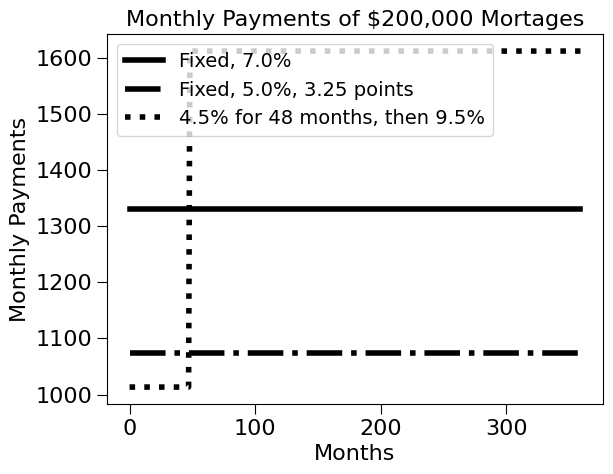

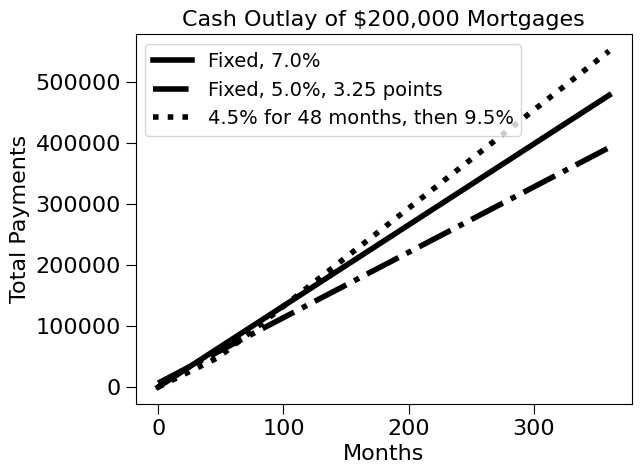

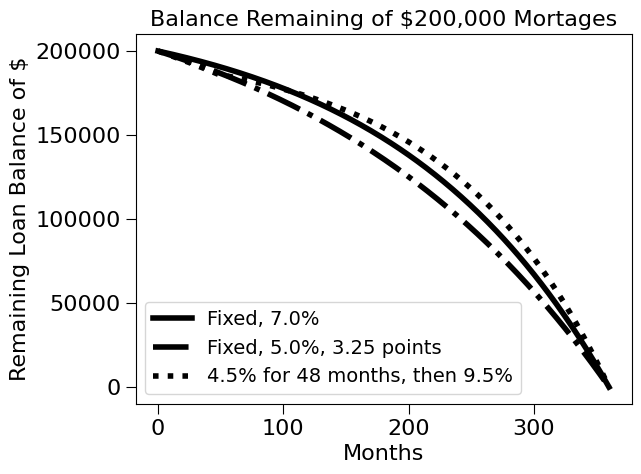

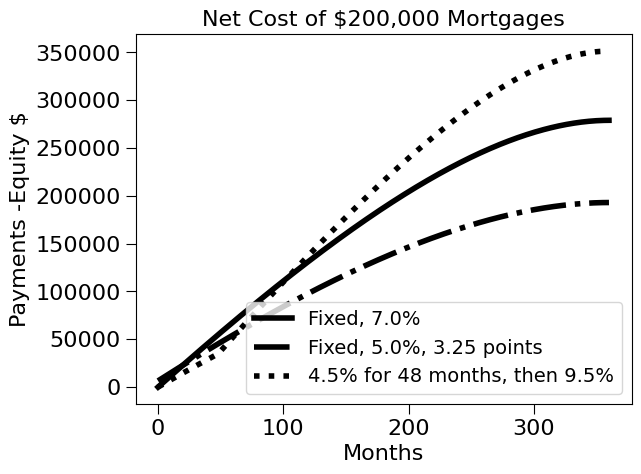

In [15]:
compare_mortgages(amt=200000, years=30, fixed_rate=0.07, 
                  pts = 3.25, pts_rate=0.05, var_rate1=0.045, 
                  var_rate2=0.095, var_months=48) 

## 13.3 전염병을 위한 인터랙티브 그래프

그림 13-14 전염병 확산 시뮬레이션

In [16]:
def simulation(fixed, variable): 
    infected = [fixed['initial_infections']] 
    new_infections = [fixed['initial_infections']] 
    total_infections = fixed['initial_infections'] 

    for t in range(fixed['duration']): 
        cur_infections = infected[-1] 
        # 더 이상 전염성이 없는 사람들을 제외합니다
        if len(new_infections) > fixed['days_spreading']: 
            cur_infections -= new_infections[-fixed['days_spreading']-1] 
        # 사회적 거리두기가 있다면 일일 접촉 횟수를 변경합니다
        if t >= variable['red_start'] and t < variable['red_end']: 
            daily_contacts = variable['red_daily_contacts'] 
        else: 
            daily_contacts = fixed['init_contacts'] 
        # 새로운 환자를 계산합니다
        total_contacts = cur_infections * daily_contacts 
        susceptible = fixed['pop'] - total_infections 
        risky_contacts = total_contacts * (susceptible/fixed['pop']) 
        newly_infected = round(risky_contacts * fixed['contagiousness']) 
        # 변수를 업데이트합니다
        new_infections.append(newly_infected) 
        total_infections += newly_infected 
        infected.append(cur_infections + newly_infected) 
    return infected, total_infections

그림 13-15 감염 추이 그래프 함수

In [17]:
def plot_infections(infections, total_infections, fixed): 
    infection_plot = plt.plot(infections, 'r', label = 'Infected')[0] 
    plt.xticks(fontsize = 'large') 
    plt.yticks(fontsize = 'large') 
    plt.xlabel('Days Since First Infection',fontsize = 'xx-large') 
    plt.ylabel('Number Currently Infected',fontsize = 'xx-large') 
    plt.title('Number of Infections Assuming No Vaccine\n' + 
              f'Pop = {fixed["pop"]:,}, ' + 
              f'Contacts/Day = {fixed["init_contacts"]}, ' + 
              f'Infectivity = {(100*fixed["contagiousness"]):.1f}%, ' + 
              f'Days Contagious = {fixed["days_spreading"]}', 
              fontsize = 'xx-large') 
    plt.legend(fontsize = 'xx-large') 
    txt_box = plt.text(plt.xlim()[1]/2, plt.ylim()[1]/1.25, 
                       f'Total Infections = {total_infections:,.0f}', 
                       fontdict = {'size':'xx-large', 'weight':'bold', 
                                   'color':'red'}) 
    return infection_plot, txt_box 

그림 13-16 하나의 매개변수 조합으로 그래프 그리기

(<matplotlib.lines.Line2D at 0x7f3bf8131a90>,
 Text(262.5, 1977938.7600000002, 'Total Infections = 4,523,356'))

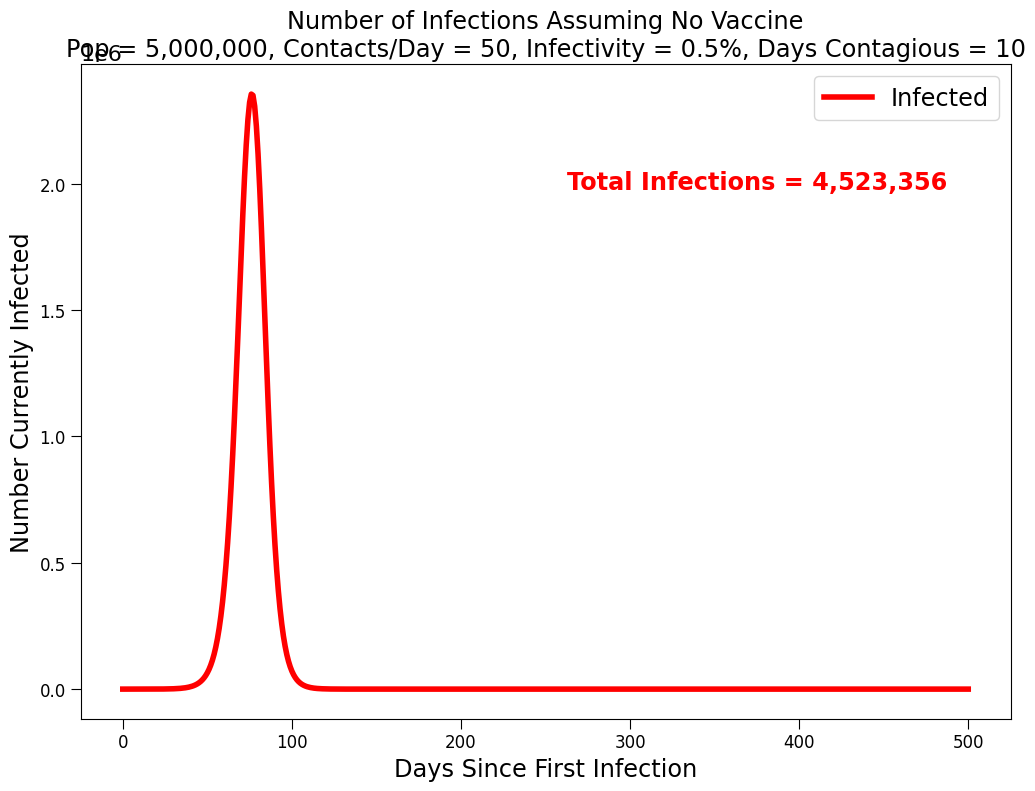

In [18]:
fixed = { 
    'pop': 5000000, # 전체 인구
    'duration': 500, # 시뮬레이션 날짜
    'initial_infections': 4, # 초기 감염 인원
    'init_contacts': 50, # 사회적 거리두기가 없는 접촉
    'contagiousness': 0.005, # 바이러스 노출시 감염 확률
    'days_spreading': 10} # 감염 후 전염 기간
variable = { 
    # 'red_daily_contacts': 4, # 사회적 거리두기
    'red_daily_contacts': fixed['init_contacts'], # 사회적 거리두기
    'red_start': 20, # 사회적 거리두기 시작
    'red_end': 200} # 사회적 거리두기 종료

infections, total_infections = simulation(fixed, variable) 
fig = plt.figure(figsize=(12, 8.5)) 
plot_infections(infections, total_infections, fixed) 

In [19]:
# 코랩에서는 정적인 그래프가 그려집니다.
# 로컬 컴퓨터의 주피터 노트북에서 인터랙티브한 그래프를 그리려면 다음 코드의 주석을 제거하고 실행하세요.
%matplotlib notebook

<IPython.core.display.Javascript object>


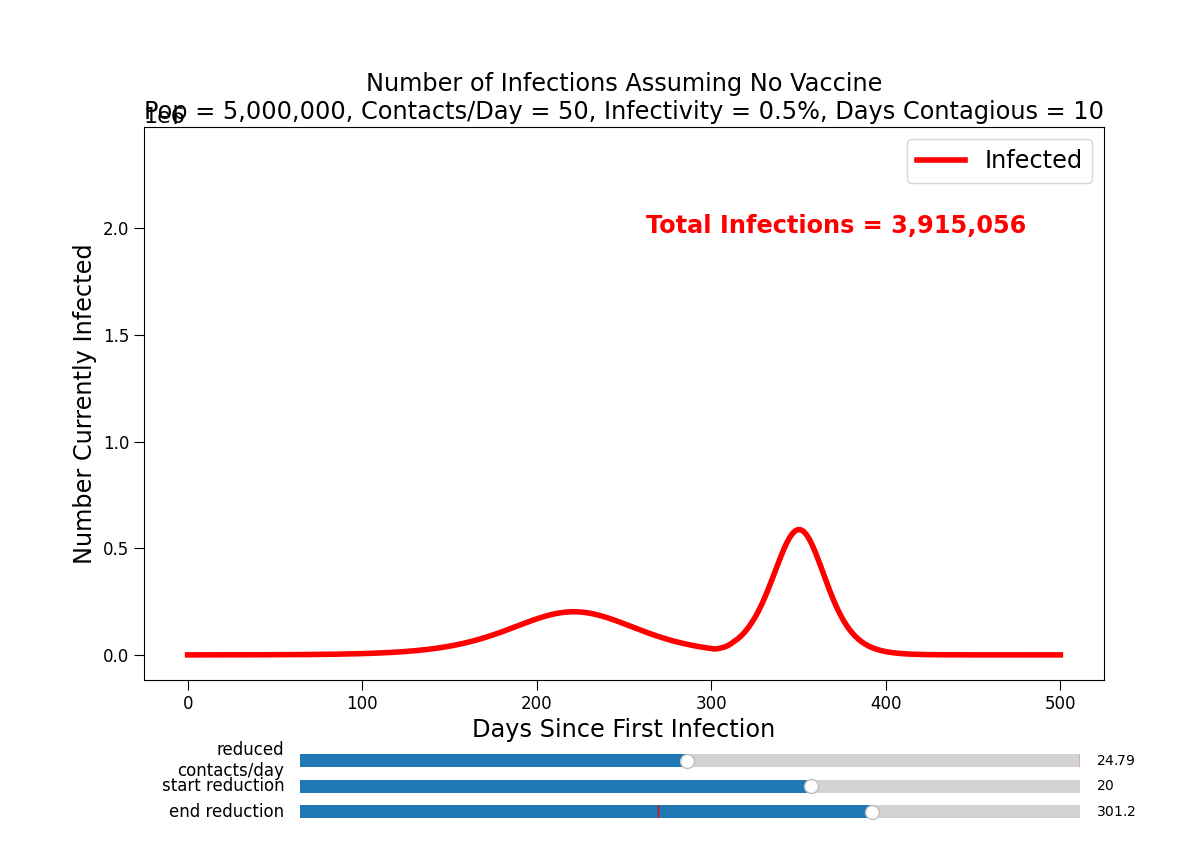

In [20]:
fig = plt.figure(figsize=(12, 8.5)) 
infections_ax = plt.axes([0.12, 0.2, 0.8, 0.65]) 
contacts_ax = plt.axes([0.25, 0.09, 0.65, 0.03]) 
start_ax = plt.axes([0.25, 0.06, 0.65, 0.03]) 
end_ax = plt.axes([0.25, 0.03, 0.65, 0.03])

from matplotlib.widgets import Slider

contacts_slider = Slider(
    contacts_ax, # 슬라이더를 담은 axes 객체
    'reduced\ncontacts/day', # 슬라이더 이름
    0, # 최솟값
    50, # 최댓값
    50) # 초깃값) 
contacts_slider.label.set_fontsize(12) 
start_day_slider = Slider(start_ax, 'start reduction', 1, 30, 20) 
start_day_slider.label.set_fontsize(12) 
end_day_slider = Slider(end_ax, 'end reduction', 30, 400, 200) 
end_day_slider.label.set_fontsize(12) 

def update(fixed, infection_plot, txt_box, 
           contacts_slider, start_day_slider, end_day_slider): 
    variable = {'red_daily_contacts': contacts_slider.val, 
                'red_start': start_day_slider.val, 
                'red_end': end_day_slider.val} 
    I, total_infections = simulation(fixed, variable) 
    infection_plot.set_ydata(I) # 새로운 y 축 값
    txt_box.set_text(f'Total Infections = {total_infections:,.0f}') 

slider_update = lambda _: update(fixed, infection_plot, txt_box, 
                                 contacts_slider, start_day_slider, 
                                 end_day_slider) 
contacts_slider.on_changed(slider_update) 
start_day_slider.on_changed(slider_update) 
end_day_slider.on_changed(slider_update) 

infections, total_infections = simulation(fixed, variable) 
plt.axes(infections_ax) 
infection_plot, txt_box = plot_infections(infections, 
                                          total_infections, fixed) 